In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [2]:
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)


Import and read CSV files

In [4]:
df = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\newdf.csv')
df

,Unnamed: 0,display_id,uuid,document_id_x,timestamp,platform,geo_location,source_id,publisher_id,publish_time,...,timestamp_month_name,the_publish_time,publish_time_year,publish_time_month,publish_time_day,publish_time_hour,publish_time_minute,publish_time_dayofweek,publish_time_dayofweek_name,publish_time_month_name
0,0,34922,6288e67b1d54c6,1794259,2600122,2,US>TX>623,93.0,407.0,2016-06-14 00:00:00,...,June,2016-06-14 00:00:00,2016.0,6.0,14.0,0.0,0.0,1.0,Tuesday,June
1,1,3982567,f90db73a75332d,1060089,253476258,1,US>VA>544,7744.0,1204.0,2016-01-23 01:00:00,...,June,2016-01-23 01:00:00,2016.0,1.0,23.0,1.0,0.0,5.0,Saturday,January
2,2,7604922,9853a49f80e2f8,1303771,520980585,2,US>MO>616,12705.0,1044.0,2016-04-14 20:00:00,...,June,2016-04-14 20:00:00,2016.0,4.0,14.0,20.0,0.0,3.0,Thursday,April
3,3,1439583,e4d4a17cf8c7e6,1667632,86010864,2,US>WA>819,7267.0,58.0,2016-06-08 00:00:00,...,June,2016-06-08 00:00:00,2016.0,6.0,8.0,0.0,0.0,2.0,Wednesday,June
4,4,3522033,4789ccff327551,1601704,228163963,2,US,12705.0,1044.0,2016-06-03 17:00:00,...,June,2016-06-03 17:00:00,2016.0,6.0,3.0,17.0,0.0,4.0,Friday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,16841692,d2e3542e47da0e,624053,1121126231,1,CA>AB,8179.0,142.0,NaN,...,June,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999996,999996,16866762,68ec61d8fa368f,2824990,1122675040,3,US>WY>759,7270.0,58.0,2016-06-26 23:00:00,...,June,2016-06-26 23:00:00,2016.0,6.0,26.0,23.0,0.0,6.0,Sunday,June
999997,999997,16859782,cf08c047cfc412,1073469,1122222637,2,CA>ON,105.0,206.0,2016-02-01 12:00:00,...,June,2016-02-01 12:00:00,2016.0,2.0,1.0,12.0,0.0,0.0,Monday,February
999998,999998,16870073,a06a4e9ca33248,385256,1122891563,1,US>VA>511,1032.0,1025.0,2014-09-21 00:00:00,...,June,2014-09-21 00:00:00,2014.0,9.0,21.0,0.0,0.0,6.0,Sunday,September


Fixing the platform issue from exporting the other notebook dataframe as a CSV file and importing it in another notebook

In [5]:
df.platform.value_counts()

1    430327
2    422892
3    146781
Name: platform, dtype: int64

Some graphs

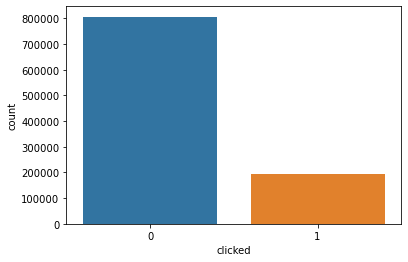

In [6]:
ax = sns.countplot(x="clicked", data=df)

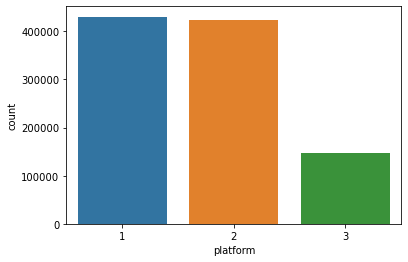

In [7]:
ax = sns.countplot(x="platform", data=df)

In [8]:
pd.crosstab(df['clicked'],df['platform']).apply(lambda x: x/x.sum(), axis=1)

platform,1,2,3
clicked,,,
0,0.440736,0.409933,0.149331
1,0.387037,0.476787,0.136176


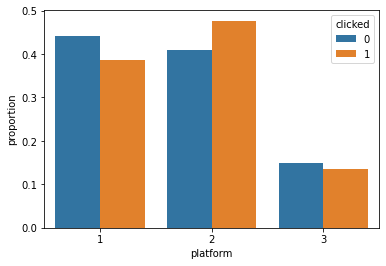

In [9]:
x, y, hue = "platform", "proportion", "clicked"
hue_order = ["Clicked", "Not clicked"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

In [ ]:
# predicting platform with clicks idk